Imports - импортируем все необходимое

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
X_full = pd.read_csv('giving_departures.csv', index_col='id')
#X_test_full = pd.read_csv('db.csv', index_col='id')

In [4]:
X_full

,down_time_train,interval_giving,idle_train,travel_time,crew_down_time,crew_down_time_plan,intermediate_down_time,route_id,sender_id,receiver_id,real_wagon_loading,real_train_weight_gross,real_train_wight_net,cargo_type_id,empty_types_id,down_time,axis_count
id,,,,,,,,,,,,,,,,,
24,0.583333,0.0,4.950000,-7.600000,2.40000,-2.050008,NaN,7506,109,3825,62,1635.0,0.0,1141,0,4.950000,248
32,2.002778,0.0,26.000000,-17.666667,NaN,NaN,NaN,7502,505,131,70,1657.9,0.0,1141,0,26.000000,280
33,2.666667,0.0,2.283333,2.966667,NaN,NaN,NaN,7503,132,131,71,1681.0,0.0,1141,0,2.283333,284
34,2.000000,0.0,6.533333,3.466667,NaN,0.900000,NaN,7503,82,131,71,1681.0,0.0,1141,0,6.533333,284
35,3.000000,0.0,3.650000,3.183333,NaN,NaN,NaN,7503,132,131,67,1583.0,0.0,1141,0,3.650000,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5394,0.750000,0.0,1.500000,3.333333,NaN,NaN,0.433333,7492,131,505,70,6574.9,4890.5,5229,1,1.500000,280
5395,2.416667,0.0,5.733333,2.683333,NaN,NaN,NaN,7502,505,131,69,1647.0,0.0,1141,0,5.733333,276
5396,0.500000,0.0,2.350000,35.900000,5.15004,1.116672,4.266667,7500,485,82,53,4961.8,3708.0,102,1,2.350000,212


Data explorationData exploration

In [5]:
print(X_full.columns)

Index(['down_time_train', 'interval_giving', 'idle_train', 'travel_time',
       'crew_down_time', 'crew_down_time_plan', 'intermediate_down_time',
       'route_id', 'sender_id', 'receiver_id', 'real_wagon_loading',
       'real_train_weight_gross', 'real_train_wight_net', 'cargo_type_id',
       'empty_types_id', 'down_time', 'axis_count'],
      dtype='object')


In [6]:
X_full.sample(5)

,down_time_train,interval_giving,idle_train,travel_time,crew_down_time,crew_down_time_plan,intermediate_down_time,route_id,sender_id,receiver_id,real_wagon_loading,real_train_weight_gross,real_train_wight_net,cargo_type_id,empty_types_id,down_time,axis_count
id,,,,,,,,,,,,,,,,,
7049,0.500000,0.0,6.250000,3.083333,NaN,NaN,NaN,7497,241,82,67,6270.6,4687.0,5611,1,6.250000,268
33697,0.433333,0.0,3.083333,3.483333,NaN,NaN,0.416667,7502,505,131,70,1657.0,0.0,1141,0,3.083333,280
13471,1.083333,0.0,5.450000,3.550000,NaN,NaN,NaN,7492,131,505,70,6558.7,4894.5,5229,1,5.450000,280
21933,18.150000,1.0,1.233333,3.283333,NaN,NaN,0.233333,7496,131,3925,67,6269.5,4676.8,5229,1,1.233333,268
9170,0.666667,0.0,17.116667,28.800000,3.200016,0.566664,3.750000,8580,109,1506,48,4495.0,3357.0,109,1,17.116667,192


In [6]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33246 entries, 24 to 5969
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   down_time_train          33246 non-null  float64
 1   interval_giving          33246 non-null  float64
 2   idle_train               33246 non-null  float64
 3   travel_time              33246 non-null  float64
 4   crew_down_time           11743 non-null  float64
 5   crew_down_time_plan      3834 non-null   float64
 6   intermediate_down_time   19841 non-null  float64
 7   route_id                 33246 non-null  int64  
 8   sender_id                33246 non-null  int64  
 9   receiver_id              33246 non-null  int64  
 10  real_wagon_loading       33246 non-null  int64  
 11  real_train_weight_gross  33246 non-null  float64
 12  real_train_wight_net     33246 non-null  float64
 13  cargo_type_id            33246 non-null  int64  
 14  empty_types_id           33

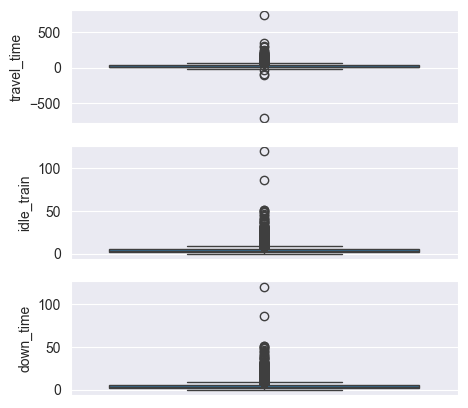

In [8]:
fig, axs = plt.subplots(3, figsize=(5, 5))
plt1 = sns.boxplot(X_full['travel_time'], ax = axs[0])
plt1 = sns.boxplot(X_full['idle_train'], ax = axs[1])
plt1 = sns.boxplot(X_full['down_time'], ax = axs[2])

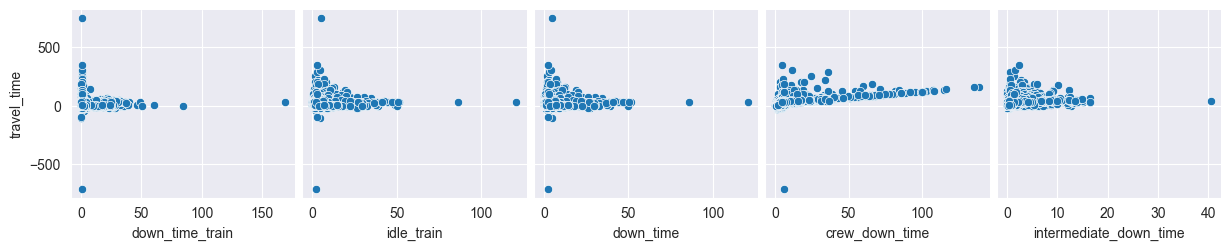

In [12]:
sns.pairplot(X_full, x_vars=['down_time_train', 'idle_train', 'down_time', 'crew_down_time', 'intermediate_down_time'], y_vars='travel_time')

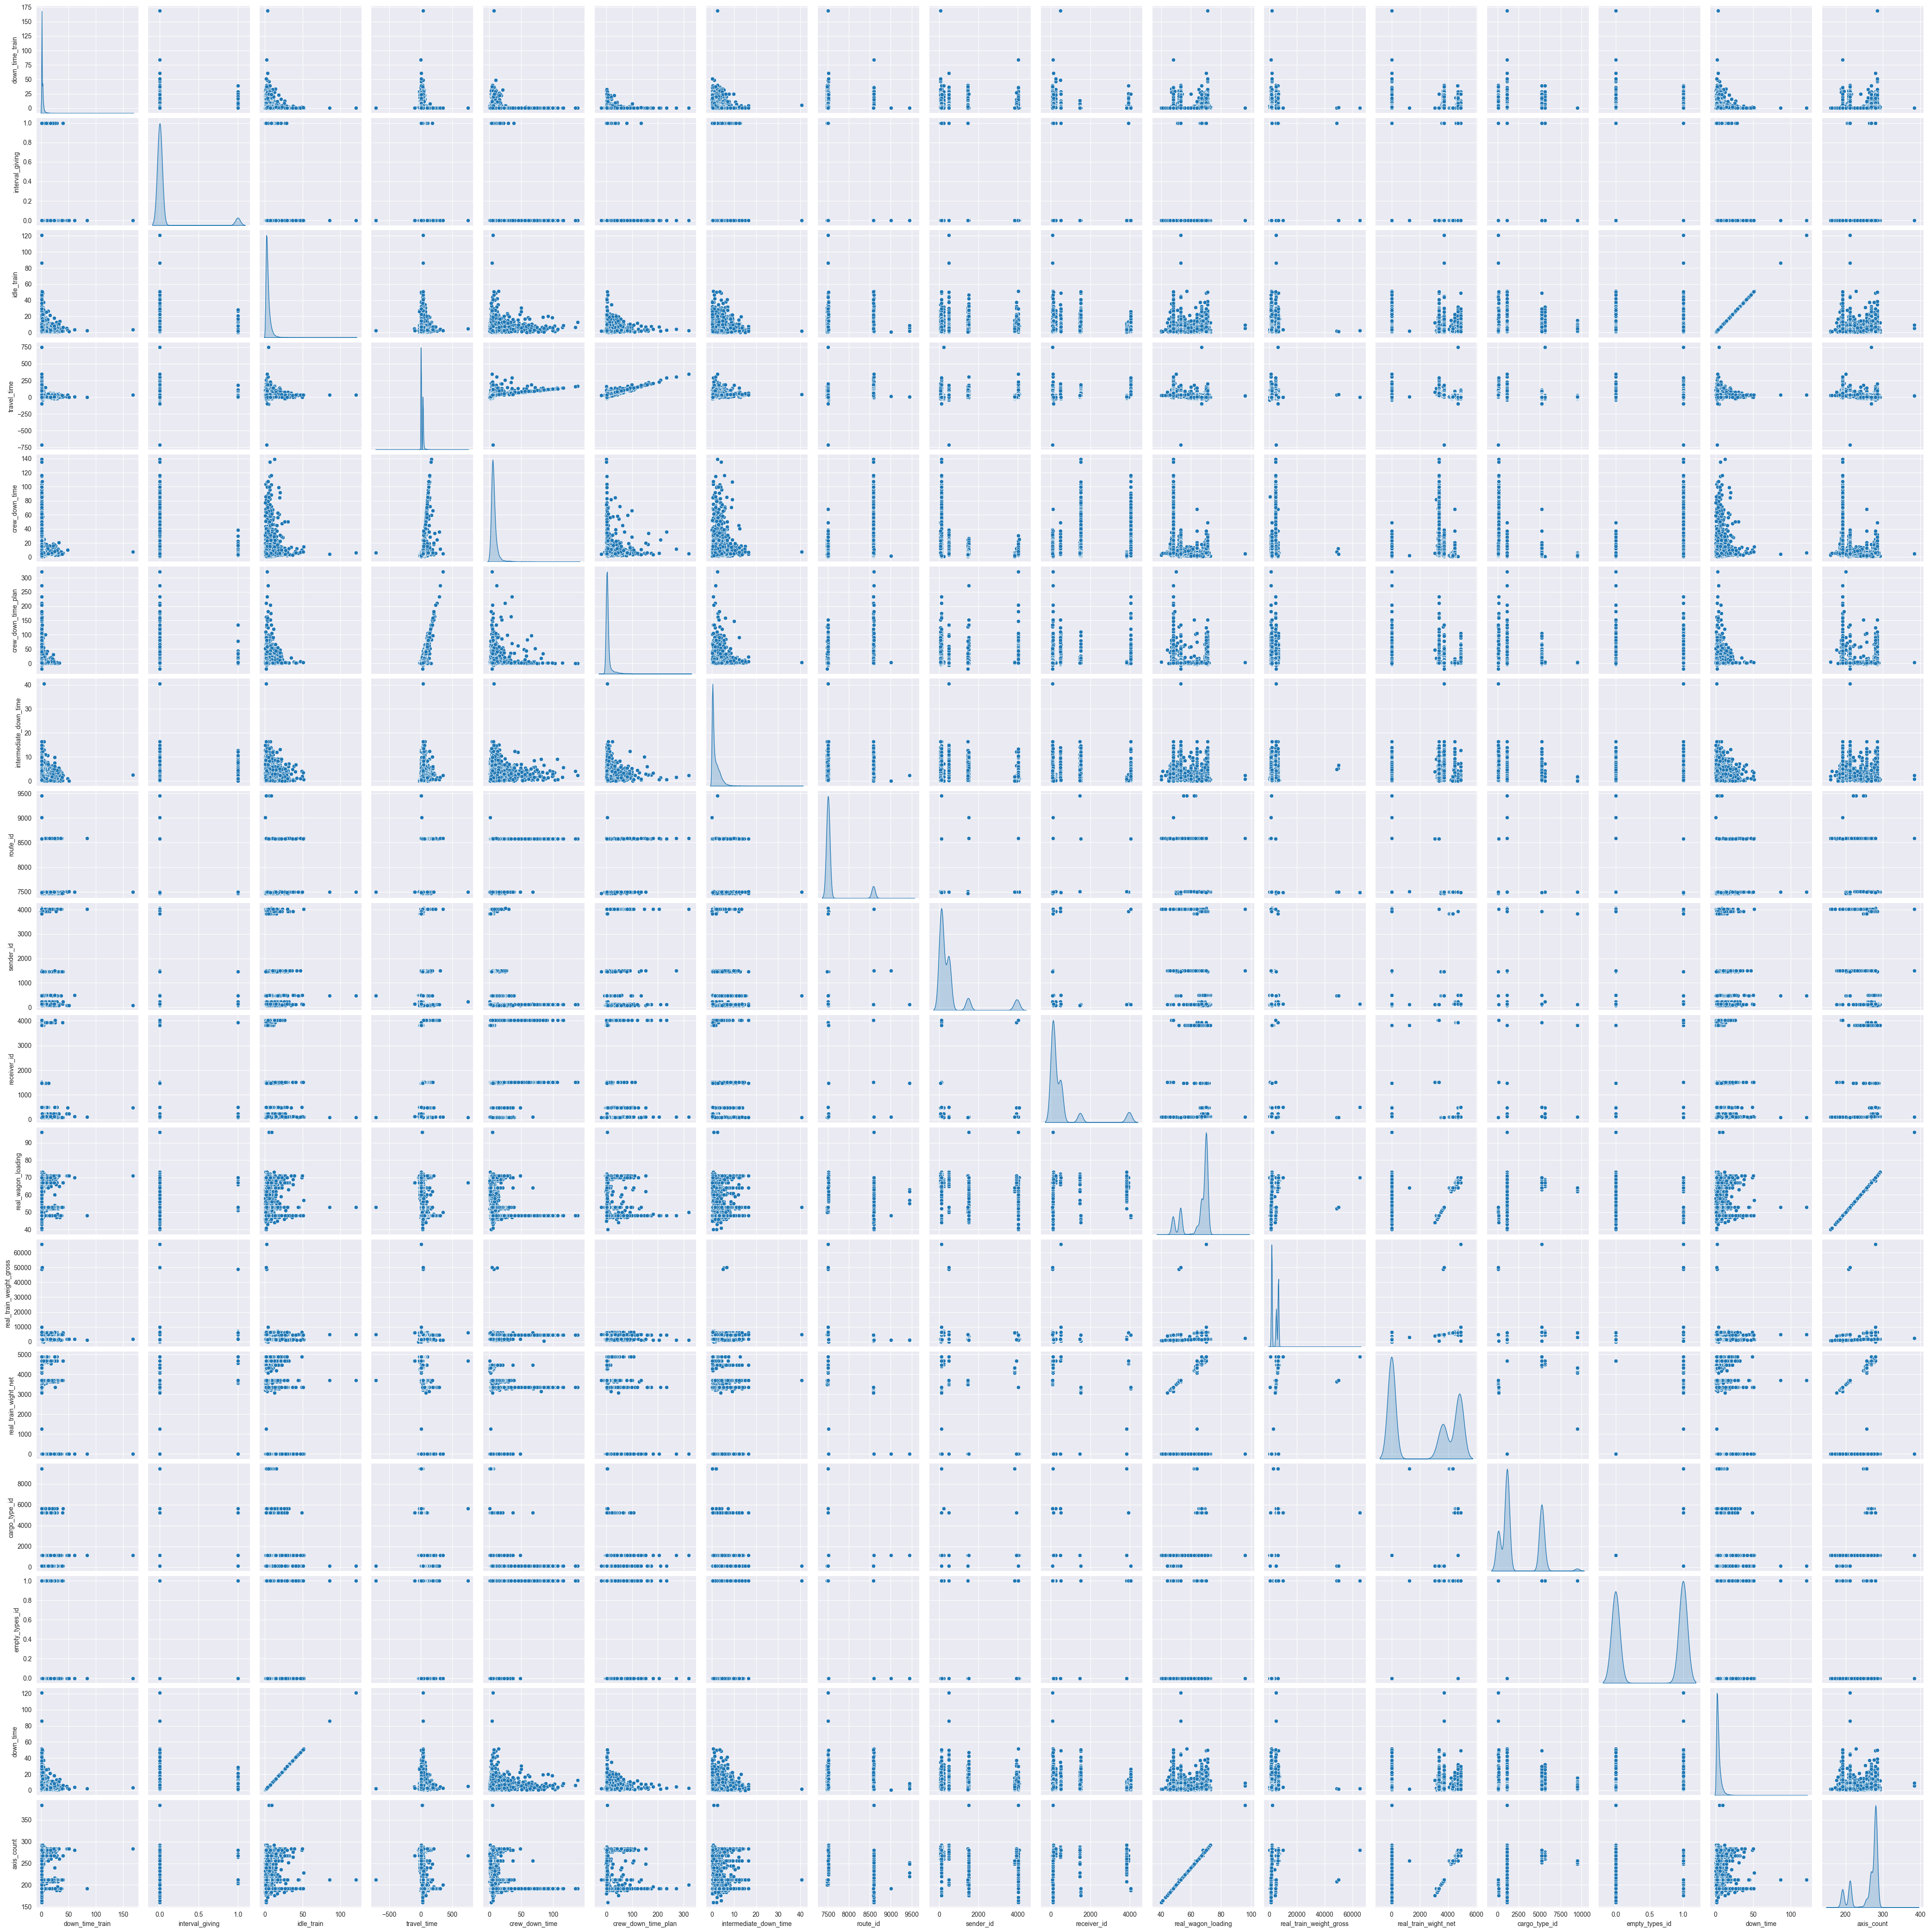

In [9]:
sns.pairplot(X_full, diag_kind='kde')

<Axes: >

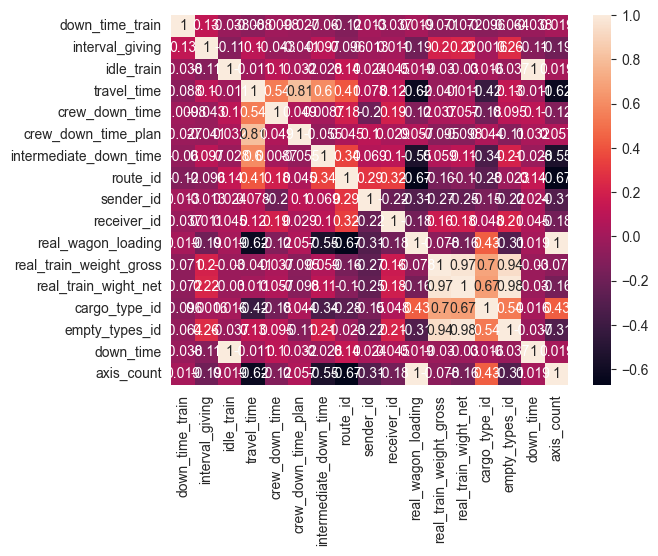

In [9]:
sns.heatmap(X_full.corr(), annot=True)

Data preparation - осуществляем базовые преобразования датасета

In [10]:
# Удаляем из датасета строки, в которых недостаточно данных для обучения.
X_full.dropna(axis=0, subset=['travel_time'], inplace=True)
# Разбиваем датасет на цель (y) и входные данные (X)
y = X_full.travel_time
X_full.drop(['travel_time'], axis=1, inplace=True)

# Разбиваем датасет на train/val
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y,
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [11]:
# В наших данных есть нечисловые значения. Они затрудняют обработку
# поэтому мы оставим только те данные, где нечисловые значения имеют меньше 10 разных значений
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and
                    X_train_full[cname].dtype == "object"]

# и все числовые данные
numerical_cols = [cname for cname in X_train_full.columns if
                X_train_full[cname].dtype in ['int64', 'float64']]

# все столбцы, в которых количество пропусков больше 10% X[cname].isnull().sum()

# оставим в датасете только те колонки, с которыми хотим работать дальше
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
#X_test = X_test_full[my_cols].copy()

Sanity check

In [12]:
print(len(X_train.columns), len(X_train_full.columns))
X_train.head()

16 16


,down_time_train,interval_giving,idle_train,crew_down_time,crew_down_time_plan,intermediate_down_time,route_id,sender_id,receiver_id,real_wagon_loading,real_train_weight_gross,real_train_wight_net,cargo_type_id,empty_types_id,down_time,axis_count
id,,,,,,,,,,,,,,,,
31502,0.500000,0.0,14.800000,NaN,NaN,0.433333,7504,82,241,70,1656.0,0.0,1141,0,14.800000,280
27793,2.000000,0.0,3.316667,NaN,NaN,0.933333,7502,505,131,69,1638.0,0.0,1141,0,3.316667,276
26657,6.216667,0.0,2.316667,6.016680,NaN,0.500000,7474,1465,82,53,4957.0,3704.5,102,1,2.316667,212
22819,0.683333,0.0,5.216667,10.283328,NaN,0.783333,7501,82,485,69,1642.0,0.0,1141,0,5.216667,276
16027,2.883333,0.0,3.100000,NaN,NaN,0.083333,7502,505,131,70,1659.0,0.0,1141,0,3.100000,280


#Pipeline

Baseline - базовый пайплайн, от которого мы будем отталкиваться в дальнейшем

###Data preparation (preprocessing)

In [25]:
# Инициализируем препроцессор для заполнения недостающих числовых значений
# MinMaxScaler, StandardScaler, RobustScaler
# strategy: median, mean, most_frequent
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# Инициализируем препроцессор для заполнения недостающих НЕ числовых значений
# Добавляем шаг кодирования НЕ числовых значений в числовые
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Создаем общий препроцессор данных, соединив первые два
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
    ])

### Model

In [26]:
# Инициализируем модель
model = RandomForestRegressor(n_estimators=100, random_state=0, verbose=True)

In [27]:
# Создаем пайплайн из модели и препроцессора
classifier = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)],
                      verbose=True)

### Training

In [28]:
# Передаем обучающие данные в пайплайн, обучаем
classifier.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    7.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   36.7s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   36.9s finished


[Pipeline] ............. (step 2 of 2) Processing model, total=  37.0s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['down_time_train',
                                                   'interval_giving',
                                                   'idle_train',
                                                   'crew_down_time',
                                                   'crew_down_time_plan',
                                                   'intermediate_down_time',
                                                   'route_id', 'sender_id',
                                                   'receiver_id',
                                                   'real_wagon_loading',
                                                   'real_train_weight_gross',
                                                   'real_train_wight_net',
                                                   'cargo_type_id',
                                                   'empty_types_id',
                                                   'down_time', 'axis_count']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('model',
                 RandomForestRegressor(n_estimators=200, random_state=0,
                                       verbose=True))],
         verbose=True)

### Model evaluation

In [29]:
# Передаем валидационные данные в пайплайн, получаем предсказания
preds = classifier.predict(X_valid)

# Оцениваем точность модели
print('MAE:', mean_absolute_error(y_valid, preds))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


MAE: 1.053003021267436


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished


In [19]:
y_valid.mean()

np.float64(14.315332829022557)

In [130]:
(1 - 1.021542247513898/14.315332829022557)*100

92.86399932355853

In [30]:
print('MSE:', mean_squared_error(y_valid, preds))

MSE: 19.8606783578562


In [31]:
routes_to_check = 80
print(X_valid.iloc[routes_to_check].to_string())
print()
print(y_valid.iloc[routes_to_check])

down_time_train               3.416667
interval_giving               0.000000
idle_train                    6.150000
crew_down_time                     NaN
crew_down_time_plan                NaN
intermediate_down_time             NaN
route_id                   7503.000000
sender_id                   132.000000
receiver_id                 131.000000
real_wagon_loading           67.000000
real_train_weight_gross    1597.000000
real_train_wight_net          0.000000
cargo_type_id              1141.000000
empty_types_id                0.000000
down_time                     6.150000
axis_count                  268.000000

3.1


In [32]:
classifier.predict(X_valid.iloc[routes_to_check:routes_to_check + 1])

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


array([3.33433328])

In [33]:
r2_score(y_valid, preds)

0.9296553049688785